```Test mardown```

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from random import random

In [2]:
df = pd.read_csv('winequality-red.csv',';')

In [3]:
import matplotlib.pyplot as plt

def scatterplot_matrix(data, good_threshold, bad_threshold, save_plot=False):

    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numdata, ncols=numdata, figsize=(100, 100))
    fig.subplots_adjust(hspace=0, wspace=0)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

#     data[data["quality"] >= bad_threshold and data["quality"] <= good_threshold]
    colors = ['green' if k > good_threshold else 'red' if k < bad_threshold else 'white' for k in data["quality"]]
    numdata -= 1 # quality
    for i in range(numdata):
        axes[i,i].text(0.5, 0.5, data.columns[i], horizontalalignment='center',
                       verticalalignment='center', fontsize=62)
        print(str(i * 10) + '%')
        j = 0
        for j in range(numdata):
            if (j == i):
                continue   
            axes[i, j].scatter(data[data.columns[j]], data[data.columns[i]], c=colors, s=200)
    plt.tight_layout()
    if (save_plot == True):
        plt.savefig("scatter_matrix.png")
    
    plt.show()
#     fig

In [4]:
%%time
# print(df.iloc[1])
scatterplot_matrix(df, 6, 5)

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


CPU times: user 29.6 s, sys: 401 ms, total: 30 s
Wall time: 30.1 s


In [5]:
class Perceptron(object):
    
    def __init__(self, data):
        self.data    = data
        self.bias    = random()
        self.weights = [random() for i in range(data.shape[1] - 1)]
        
    def predict(self, input_row):
        summ = self.bias
        for i, value in enumerate(input_row):
            summ += value * self.weights[i]
        return 1.0 if summ > 0.0 else 0.0

    def train_epoch(self):
        epoch_error = 0.0
        for row in self.data:
#             print(row)
            true_answer = row[-1]
            prediction = self.predict(row[:-1])
            error = true_answer - prediction
            epoch_error += error**2
            self.bias += self.learning_rate * error
            for i, value in enumerate(row[:-1]):
                self.weights[i] += self.learning_rate * error * value
        return epoch_error

    def train_data(self, a_epochs, learning_rate, verbose=False):
        self.learning_rate = learning_rate
        current_epoch = 0
        performance = []
#         print(self.weights)
        
        while True:
            epoch_error = self.train_epoch()
            
            tuple = (current_epoch, epoch_error, self.weights, self.bias)
            performance.append(tuple)
            if (verbose):
                print(tuple)
            
            if (a_epochs == 0):
                if epoch_error == 0:
                    break
            else:
                if current_epoch >= a_epochs:
                    break
            current_epoch += 1
               
        return performance
        

In [21]:
df = df.assign(goodness = pd.Series(df['quality'] > 5, dtype=int))
df = df[(df['quality'] > 7) | (df['quality'] < 4)]
selected_data = df.loc[:, ['pH', 'alcohol', 'goodness']]
# selected_data = selected_data.reset_index(drop=True)
# selected_wine_data = wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)][features]
print(selected_data)
# selected_data.shape

        pH  alcohol  goodness
267   3.35    12.80         1
278   3.23    12.60         1
390   3.56    12.90         1
440   2.88     9.80         1
455   3.22    13.40         1
459   3.25     9.00         0
481   3.15    11.70         1
495   3.15    11.00         1
498   3.15    11.00         1
517   3.16     8.40         0
588   3.72    14.00         1
690   3.63    10.70         0
828   3.46    12.70         1
832   3.38     9.90         0
899   3.48    11.00         0
1061  3.21    12.50         1
1090  2.98    11.80         1
1120  3.20    13.10         1
1202  3.35    11.70         1
1269  3.50    14.00         1
1299  3.50    10.90         0
1374  3.32     9.80         0
1403  3.23    10.00         1
1449  3.23    11.30         1
1469  3.31     9.70         0
1478  3.40    10.20         0
1505  3.55     9.95         0
1549  3.24    11.40         1


In [30]:
def plot_errors(ax, performance):
    epochs = [i[0] for i in performance]
    errors = [i[1] for i in performance]
    ax.plot(epochs, errors)
#     ax.set_xlim(xmax=len(performance) + 1000)
    ax.set_ylim(ymin=-1)
    ax.set_title('Errors as a function of epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('classification errors')
    
def plot_boundary_decision(ax, performance, epoch):
    weights = performance[epoch][2]
    
    x = selected_data.loc[:, 'pH']
    y = selected_data.loc[:, 'alcohol']

    ax.plot(x, y, '.')
    
def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    """
    Plot the performance of perceptron or adaline.
    This function will produce a two plot figure:
    1) Number of classification errors as a function of epochs
    2) Decision boundary for two factors
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    plot_errors(axes[0], performance)
    plot_boundary_decision(axes[1], performance, epoch)
    plt.show()

(13052, 0.0, [-36.243583230119825, 8.650172892005195], 30.56926885314002)
0.0
0.0
0.0
0.0
0.0


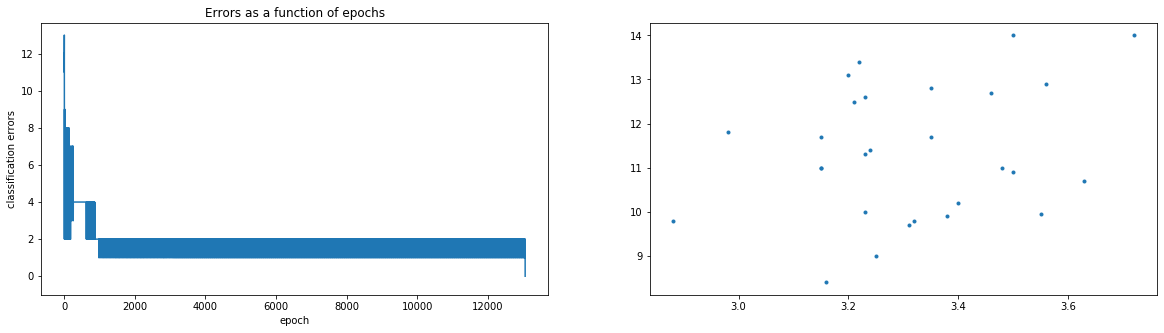

In [31]:
new_percetpron = Perceptron(selected_data.values)

performance = new_percetpron.train_data(0, 0.05, False)

print(performance[-1])

print(new_percetpron.predict([12.80, 3.35])) #1
print(new_percetpron.predict([10.20, 3.40])) #0
print(new_percetpron.predict([11.80, 2.98])) #1
print(new_percetpron.predict([14.00, 3.72])) #1
print(new_percetpron.predict([9.80, 3.32])) #0
plot_performance(performance, selected_data, 4, 7)